<a href="https://colab.research.google.com/github/pughlab/COMBAT/blob/main/cfmedip_fragmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Pughlab-Work/COMBAT/2025-02-11_COMBAT_cfmedip_insert_size_counts.tsv'
df = pd.read_csv(file_path, sep = '\t')

In [ ]:
# prompt:  Remove the column with names: "COMBAT_0011_02_LB02-01_1" and "COMBAT_0012_02_LB02-01_1". Filter the rows based on the insert_size column for greater than 50 and less than 250.

# Remove specified columns
columns_to_remove = ["COMBAT_0011_02_LB02-01_1", "COMBAT_0012_02_LB02-01_1"]
df = df.drop(columns=columns_to_remove, errors='ignore')

# Filter rows based on insert_size
df_filtered = df[(df['insert_size'] > 50) & (df['insert_size'] < 250)]


In [ ]:
df_filtered

,insert_size,COMBAT_0001_02_LB02-01,COMBAT_0002_02_LB02-01,COMBAT_0003_02_LB02-01,COMBAT_0004_02_LB02-01,COMBAT_0005_02_LB02-01,COMBAT_0006_02_LB02-01,COMBAT_0007_02_LB02-01,COMBAT_0008_02_LB02-01,COMBAT_0009_02_LB02-01,COMBAT_0010_02_LB01-01,COMBAT_0014_02_LB02-01,COMBAT_0015_02_LB02-01,COMBAT_0016_01_LB02-01,COMBAT_0017_01_LB02-01,COMBAT_0018_01_LB02-01,COMBAT_0019_01_LB02-01,COMBAT_0020_01_LB02-01,COMBAT_0021_01_LB02-01
49,51,416,637,966,846,1169,694,1183,888,1472,1227,1120,1462,1909,653,538,654,1072,725
50,52,446,624,981,843,1104,634,1073,849,1384,1131,1074,1473,1866,593,467,568,1013,719
51,53,424,687,958,750,1117,624,1015,893,1402,1233,1221,1536,2010,595,474,565,1021,764
52,54,528,745,1106,885,1266,680,1148,944,1617,1292,1254,1688,2416,757,626,722,1085,892
53,55,458,690,1056,839,1187,689,1116,965,1658,1329,1283,1592,2542,626,571,640,1070,862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,245,1392,2761,3014,2777,2060,3168,4382,4192,6162,4107,3417,4435,5065,2289,2177,2298,2534,2956
244,246,1276,2647,2983,2624,1926,3130,4285,4040,6204,4007,3306,4283,5116,2221,2171,2208,2488,2973
245,247,1313,2764,2902,2614,1925,2948,4055,3848,5959,3889,3272,4189,4951,2089,2106,2165,2417,2929
246,248,1283,2617,2903,2591,1820,3110,4116,3949,5906,4015,3272,4215,4841,2123,2093,2120,2418,2901


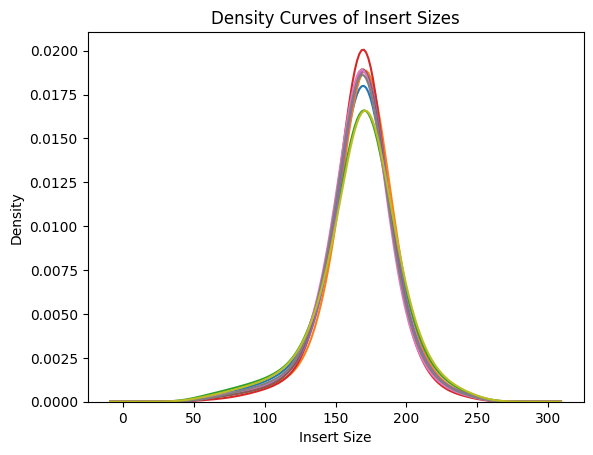

In [ ]:
# prompt: Based on the first column "insert_size" plot the histogram density curve of every other column for "insert_size" values. Put all the curves in one plot.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_filtered is defined from the previous code

# Iterate over every other column, starting from the second column (index 1)
for i in range(1, len(df_filtered.columns), 2):
    column_name = df_filtered.columns[i]
    sns.kdeplot(data=df_filtered, x="insert_size", weights=df_filtered[column_name], label=column_name)

plt.xlabel("Insert Size")
plt.ylabel("Density")
plt.title("Density Curves of Insert Sizes")
#plt.legend()
plt.show()


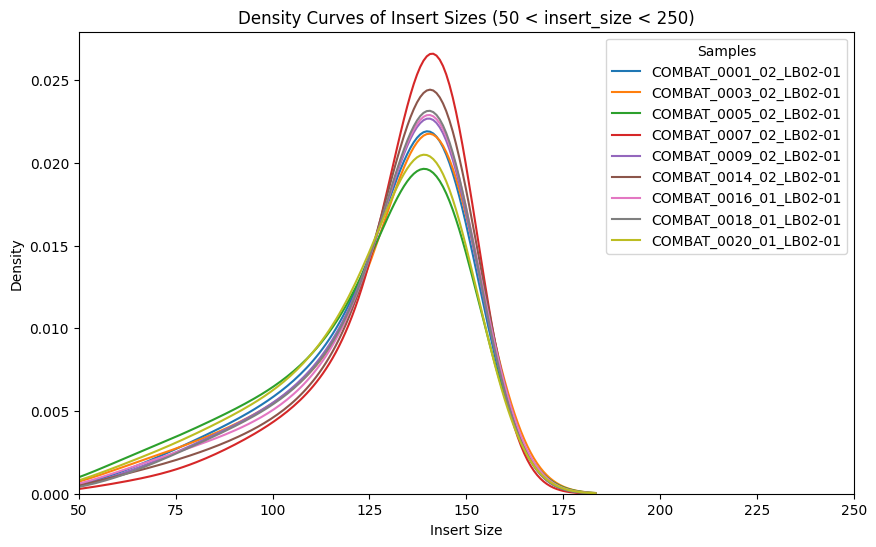

In [ ]:
# prompt: In a new plot do the above only for the insert_size of greater than 50 and less than 150.

# Assuming df_filtered is defined from the previous code
df_filtered = df[(df['insert_size'] > 50) & (df['insert_size'] < 150)]
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Iterate over every other column, starting from the second column (index 1)
for i in range(1, len(df_filtered.columns), 2):
    column_name = df_filtered.columns[i]
    sns.kdeplot(data=df_filtered, x="insert_size", weights=df_filtered[column_name], label=column_name)

plt.xlabel("Insert Size")
plt.ylabel("Density")
plt.title("Density Curves of Insert Sizes (50 < insert_size < 250)")
plt.legend(title='Samples')
plt.xlim(50, 250) # set the x-axis limits
plt.show()
